In [68]:
%matplotlib inline

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [70]:
from australian_housing import paths

In [71]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0)

In [72]:
model = ARIMA(ts, order=(2,1,2), freq='MS')
model_fit = model.fit()

In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                   72
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -507.555
Method:                       css-mle   S.D. of innovations            271.225
Date:                Fri, 07 Dec 2018   AIC                           1027.110
Time:                        10:00:27   BIC                           1040.770
Sample:                    08-01-2011   HQIC                          1032.548
                         - 07-01-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            18.8354      2.031      9.273      0.000      14.854      22.817
ar.L1.D.Value     1.1324      0.582      1.947      0.056      -0.008       2.273
ar.L2.D.Value    -0.2791      0.190     -1.472      0.146      -0.651       0.092
ma.L1.D.Value    -1.8185      0.592     -3.073      0.003      -2.978      -0.659
ma.L2.D.Value     0.8185      0.591      1.385      0.171      -0.340       1.977
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2991           +0.0000j            1.2991            0.0000
AR.2            2.7578           +0.0000j            2.7578            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.2217           +0.0000j            1.2217            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
residuals = pd.DataFrame(model_fit.resid)

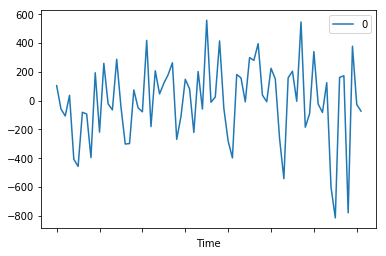

In [75]:
residuals.plot();

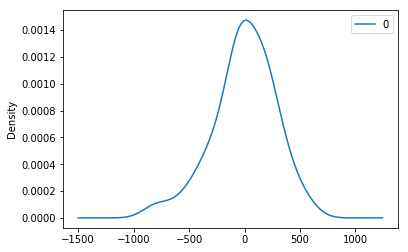

In [76]:
residuals.plot(kind='kde');

In [77]:
residuals.describe()

,0
count,72.000000
mean,-4.423423
std,278.346876
min,-813.819168
25%,-107.132258
50%,-7.886471
75%,180.350067
max,557.958416


In [78]:
history = model_fit.predict(ts.index[12], ts.index[-1])
prediction = model_fit.predict(ts.index[-1], '2020-07-01')

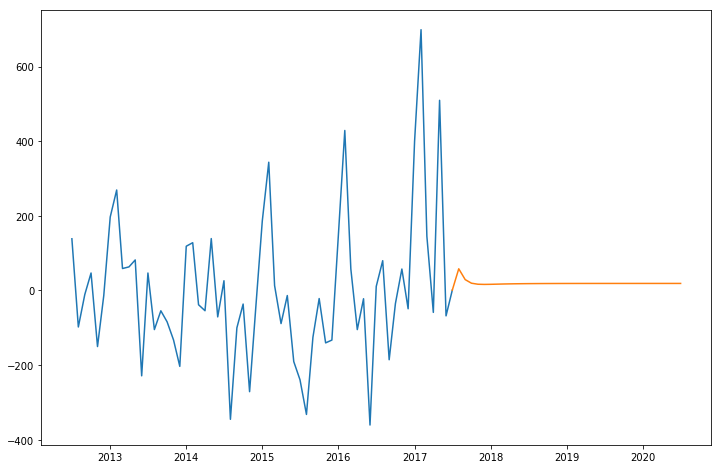

In [79]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.plot(history);
ax.plot(prediction);

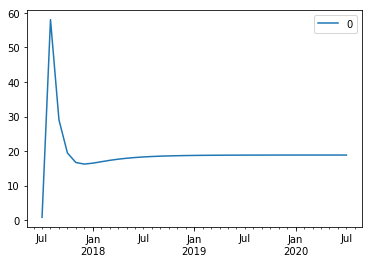

In [80]:
pd.DataFrame(model_fit.predict(ts.index[-1], '2020-07-01')).plot();